8.2.1. Линейное программирование

In [1]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

   Updating registry at `C:\Users\Admin\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


In [2]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [3]:
# Определение переменных x, y и граничных условий для них:
@variable(model, x >= 0)
@variable(model, y >= 0)

y

In [4]:
# Определение ограничений модели:
@constraint(model, 6x + 8y >= 100)
@constraint(model, 7x + 12y >= 120)

7 x + 12 y >= 120.0

In [5]:
# Определение целевой функции:
@objective(model, Min, 12x + 20y)

12 x + 20 y

In [6]:
# Вызов функции оптимизации:
optimize!(model)

In [7]:
# Определение причины завершения работы оптимизатора:
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [8]:
# Демонстрация первичных результирующих значений переменных x и y:
@show value(x);
@show value(y);

value(x) = 14.999999999999993
value(y) = 1.2500000000000047


In [9]:
# Демонстрация результата оптимизации:
@show objective_value(model);

objective_value(model) = 205.0


8.2.2. Векторизованные ограничения и целевая функция оптимизации

In [10]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


In [11]:
# Определение объекта модели с именем vector_model:
vector_model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [12]:
# Определение начальных данных:
A= [ 1 1 9 5;
3 5 0 8;
2 0 6 13]
b = [7; 3; 5]
c = [1; 3; 5; 2]

4-element Array{Int64,1}:
 1
 3
 5
 2

In [13]:
# Определение вектора переменных:
@variable(vector_model, x[1:4] >= 0)

4-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]
 x[4]

In [14]:
# Определение ограничений модели:
@constraint(vector_model, A * x .== b)

3-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 x[1] + x[2] + 9 x[3] + 5 x[4] == 7.0
 3 x[1] + 5 x[2] + 8 x[4] == 3.0
 2 x[1] + 6 x[3] + 13 x[4] == 5.0

In [15]:
# Определение целевой функции:
@objective(vector_model, Min, c' * x)

x[1] + 3 x[2] + 5 x[3] + 2 x[4]

In [16]:
# Вызов функции оптимизации:
optimize!(vector_model)

In [17]:
# Определение причины завершения работы оптимизатора:
termination_status(vector_model)

OPTIMAL::TerminationStatusCode = 1

In [18]:
# Демонстрация результата оптимизации:
@show objective_value(vector_model);

objective_value(vector_model) = 4.9230769230769225


8.2.3. Оптимизация рациона питания

In [19]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


In [20]:
# Контейнер для хранения данных об ограничениях на количество  потребляемых калорий, белков, жиров и соли:
category_data = JuMP.Containers.DenseAxisArray(
    [1800 2200;
91 Inf;
0 65;
0 1779],
["calories", "protein", "fat", "sodium"],
["min", "max"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
    Dimension 2, ["min", "max"]
And data, a 4×2 Array{Float64,2}:
 1800.0  2200.0
   91.0    Inf
    0.0    65.0
    0.0  1779.0

In [21]:
# массив данных с наименованиями продуктов:
foods = ["hamburger", "chicken", "hot dog", "fries", "macaroni",
 "pizza","salad", "milk", "ice cream"]

9-element Array{String,1}:
 "hamburger"
 "chicken"
 "hot dog"
 "fries"
 "macaroni"
 "pizza"
 "salad"
 "milk"
 "ice cream"

In [22]:
# Массив стоимости продуктов:
cost = JuMP.Containers.DenseAxisArray(
[2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59],
foods)

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Array{Float64,1}:
 2.49
 2.89
 1.5
 1.89
 2.09
 1.99
 2.49
 0.89
 1.59

In [23]:
# Массив данных о содержании калорий, белков, жиров и соли в продуктах питания:
food_data = JuMP.Containers.DenseAxisArray(
[410 24 26 730;
420 32 10 1190;
560 20 32 1800;
380 4 19 270;
320 12 10 930;
320 15 12 820;
320 31 12 1230;
100 8 2.5 125;
330 8 10 180],
foods,
["calories", "protein", "fat", "sodium"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
    Dimension 2, ["calories", "protein", "fat", "sodium"]
And data, a 9×4 Array{Float64,2}:
 410.0  24.0  26.0   730.0
 420.0  32.0  10.0  1190.0
 560.0  20.0  32.0  1800.0
 380.0   4.0  19.0   270.0
 320.0  12.0  10.0   930.0
 320.0  15.0  12.0   820.0
 320.0  31.0  12.0  1230.0
 100.0   8.0   2.5   125.0
 330.0   8.0  10.0   180.0

In [24]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [25]:
# Определим массив:
categories = ["calories", "protein", "fat", "sodium"]

4-element Array{String,1}:
 "calories"
 "protein"
 "fat"
 "sodium"

In [26]:
# Определение переменных:
@variables(model, begin
category_data[c, "min"] <= nutrition[c = categories] <= category_data[c, "max"]
# Сколько покупать продуктов:
buy[foods] >= 0
end)

In [27]:
# Определение целевой функции:
@objective(model, Min, sum(cost[f] * buy[f] for f in foods))

2.49 buy[hamburger] + 2.89 buy[chicken] + 1.5 buy[hot dog] + 1.89 buy[fries] + 2.09 buy[macaroni] + 1.99 buy[pizza] + 2.49 buy[salad] + 0.89 buy[milk] + 1.59 buy[ice cream]

In [28]:
# Определение ограничений модели:
@constraint(model, [c in categories],
sum(food_data[f, c] * buy[f] for f in foods) == nutrition[c])

1-dimensional DenseAxisArray{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 -nutrition[calories] + 410 buy[hamburger] + 420 buy[chicken] + 560 buy[hot dog] + 380 buy[fries] + 320 buy[macaroni] + 320 buy[pizza] + 320 buy[salad] + 100 buy[milk] + 330 buy[ice cream] == 0.0
 -nutrition[protein] + 24 buy[hamburger] + 32 buy[chicken] + 20 buy[hot dog] + 4 buy[fries] + 12 buy[macaroni] + 15 buy[pizza] + 31 buy[salad] + 8 buy[milk] + 8 buy[ice cream] == 0.0
 -nutrition[fat] + 26 buy[hamburger] + 10 buy[chicken] + 32 buy[hot dog] + 19 buy[fries] + 10 buy[macaroni] + 12 buy[pizza] + 12 buy[salad] + 2.5 buy[milk] + 10 buy[ice cream] == 0.0

In [29]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [30]:
#Для просмотра результата решения модно вывести значение переменной buy:
hcat(buy.data,JuMP.value.(buy.data))

9×2 Array{GenericAffExpr{Float64,VariableRef},2}:
 buy[hamburger]  0.6045138888888888
 buy[chicken]    0
 buy[hot dog]    0
 buy[fries]      0
 buy[macaroni]   0
 buy[pizza]      0
 buy[salad]      0
 buy[milk]       6.9701388888888935
 buy[ice cream]  2.591319444444441

8.2.4. Путешествие по миру

In [31]:
# Скачиваем данные с ресурса на git:

In [32]:
# Подключение пакетов:
import Pkg
Pkg.add("DelimitedFiles")
Pkg.add("CSV")
using DelimitedFiles
using CSV

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


In [33]:
# Считывание данных:
passportdata = readdlm("passport-index-matrix.csv",',')

200×200 Array{Any,2}:
 "Passport"                "Albania"        …    "Afghanistan"
 "Afghanistan"             "visa required"     -1
 "Albania"               -1                      "visa required"
 "Algeria"                 "visa required"       "visa required"
 "Andorra"               90                      "visa required"
 "Angola"                  "visa required"  …    "visa required"
 "Antigua and Barbuda"   90                      "visa required"
 "Argentina"             90                      "visa required"
 "Armenia"               90                      "visa required"
 "Australia"             90                      "visa required"
 "Austria"               90                 …    "visa required"
 "Azerbaijan"            90                      "visa required"
 "Bahamas"               90                      "visa required"
 ⋮                                          ⋱  
 "United Arab Emirates"  90                      "visa required"
 "United Kingdom"        90          

In [34]:
# Подключение пакетов:
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


In [35]:
# Задаём переменные:
cntr = passportdata[2:end,1]
vf = (x -> typeof(x)==Int64 || x == "VF" || x == "VOA" ? 1 : 0).(passportdata[2:end,2:end]);

In [36]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [37]:
# Переменные, ограничения и целевая функция:
@variable(model, pass[1:length(cntr)], Bin)
@constraint(model, [j=1:length(cntr)], sum( vf[i,j]*pass[i] for i in 1:length(cntr)) >= 1)
@objective(model, Min, sum(pass))

pass[1] + pass[2] + pass[3] + pass[4] + pass[5] + pass[6] + pass[7] + pass[8] + pass[9] + pass[10] + pass[11] + pass[12] + pass[13] + pass[14] + pass[15] + pass[16] + pass[17] + pass[18] + pass[19] + pass[20] + pass[21] + pass[22] + pass[23] + pass[24] + pass[25] + pass[26] + pass[27] + pass[28] + pass[29] + pass[30] + pass[31] + pass[32] + pass[33] + pass[34] + pass[35] + pass[36] + pass[37] + pass[38] + pass[39] + pass[40] + pass[41] + pass[42] + pass[43] + pass[44] + pass[45] + pass[46] + pass[47] + pass[48] + pass[49] + pass[50] + pass[51] + pass[52] + pass[53] + pass[54] + pass[55] + pass[56] + pass[57] + pass[58] + pass[59] + pass[60] + pass[61] + pass[62] + pass[63] + pass[64] + pass[65] + pass[66] + pass[67] + pass[68] + pass[69] + pass[70] + pass[71] + pass[72] + pass[73] + pass[74] + pass[75] + pass[76] + pass[77] + pass[78] + pass[79] + pass[80] + pass[81] + pass[82] + pass[83] + pass[84] + pass[85] + pass[86] + pass[87] + pass[88] + pass[89] + pass[90] + pass[91] + pass[92]

In [38]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [39]:
# Просмотр результата:
print(JuMP.objective_value(model)," passports:",join(cntr[findall(JuMP.value.(pass) .== 1)],", "))

63.0 passports:Afghanistan, Andorra, Argentina, Australia, Azerbaijan, Bahrain, Brunei, Cambodia, Cameroon, Canada, Chile, Colombia, Comoros, DR Congo, Djibouti, Equatorial Guinea, Eritrea, Fiji, Gabon, Georgia, Guinea, Guinea-Bissau, Hong Kong, Hungary, Indonesia, Iraq, Ireland, Israel, Jamaica, Japan, Kuwait, Laos, Liberia, Libya, Macao, Madagascar, Malaysia, Maldives, Marshall Islands, Mauritania, Mauritius, Mongolia, Mozambique, Nauru, Nepal, New Zealand, North Korea, Palestine, Papua New Guinea, Qatar, Saudi Arabia, Solomon Islands, Somalia, South Sudan, Sri Lanka, Syria, Taiwan, Timor-Leste, Togo, Turkmenistan, United States, Uruguay, Vietnam

8.2.5. Портфельные инвестиции

In [40]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Convex")
Pkg.add("SCS")
Pkg.add("Statistics")
using DataFrames
using XLSX
using Plots
pyplot()
using Convex
using SCS
using Statistics

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environ

In [41]:
# Считываем данные и размещаем их во фрейм:
T = DataFrame(XLSX.readtable("stock_prices.xlsx","Sheet2")...)

,MSFT,FB,AAPL
,Any,Any,Any
1,101.93,137.95,148.26
2,102.8,143.8,152.29
3,107.71,150.04,156.82
4,107.17,149.01,157.76
5,102.78,165.71,166.52
6,105.67,167.33,170.41
7,108.22,162.5,170.42
8,110.97,161.89,172.97
9,112.53,162.28,174.97


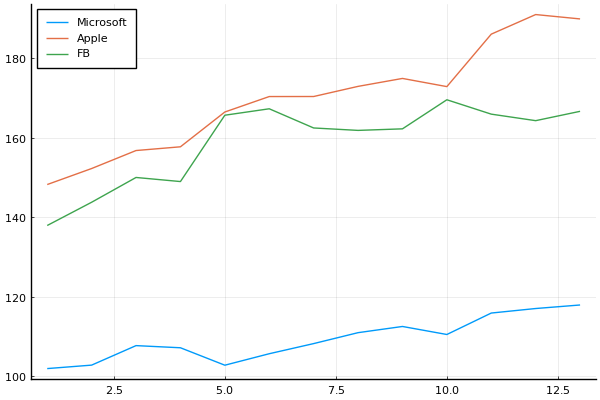

In [42]:
# Построение графика:
plot(T[!,:MSFT],label="Microsoft")
plot!(T[!,:AAPL],label="Apple")
plot!(T[!,:FB],label="FB")

In [43]:
# Данные о ценах на акции размещаем в матрице:
prices_matrix = Matrix(T)

13×3 Array{Any,2}:
 101.93  137.95  148.26
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

In [44]:
# Вычисление матрицы доходности за период времени:
M1 = prices_matrix[1:end-1,:]
M2 = prices_matrix[2:end,:]

12×3 Array{Any,2}:
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

In [45]:
# Матрица доходности:
R = (M2.-M1)./M1

12×3 Array{Float64,2}:
  0.00853527   0.0424067    0.027182
  0.0477626    0.0433936    0.0297459
 -0.00501346  -0.00686484   0.00599413
 -0.040963     0.112073     0.0555274
  0.0281183    0.00977611   0.0233606
  0.0241317   -0.0288651    5.8682e-5
  0.0254112   -0.00375385   0.014963
  0.0140579    0.00240904   0.0115627
 -0.0179508    0.0451072   -0.0117734
  0.0488644   -0.0213443    0.0763981
  0.00983522  -0.00988071   0.0264883
  0.00760359   0.0142996   -0.00575766

In [46]:
# Матрица рисков:
risk_matrix = cov(R)

3×3 Array{Float64,2}:
  0.000659383  -0.000630653  0.000139112
 -0.000630653   0.00152162   0.000192288
  0.000139112   0.000192288  0.000635503

In [47]:
# Проверка положительной определённости матрицы рисков:
isposdef(risk_matrix)

true

In [48]:
# Доход от каждой из компаний:
r = mean(R,dims=1)[:]

3-element Array{Float64,1}:
 0.012532748705136572
 0.016563036855293173
 0.02114580465503291

In [49]:
# Вектор инвестиций:
x = Variable(length(r))

Variable
size: (3, 1)
sign: real
vexity: affine
id: 111…765

In [50]:
# Объект модели:
problem = minimize(Convex.quadform(x,risk_matrix),[sum(x)==1;r'*x>=0.02;x.>=0])

minimize
└─ * (convex; positive)
   ├─ 1
   └─ qol_elem (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ …
      └─ [1.0]
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 111…765)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 111…765)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 111…765)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 111…765)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 111…765)
   └─ 0

status: `solve!` not called yet

In [51]:
# Находим решение:
solve!(problem, SCS.Optimizer)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 24, CG tol ~ 1/iter^(2.00)
eps = 1.00e-005, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 6, constraints m = 14
Cones:	primal zero / dual free vars: 2
	linear vars: 5
	soc vars: 7, soc blks: 2
Setup time: 4.75e-005s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.71e+019 2.86e+019 1.00e+000 -3.40e+019 5.17e+018 5.49e+019 1.99e-005 
    97|4.78e-011 1.28e-010 1.08e-010 4.85e-004 4.85e-004 3.76e-017 3.34e-003 
-------------------------------------------

In [52]:
#Проверяем выполнение условия
sum(x.value)

1.0000000000510323

In [53]:
#Проверяем выполнение условия на уровень доходности от 2%:
r'*x.value

1×1 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.020000000000662013

In [54]:
#Переводим процентные значения компонент вектора инвестиций в фактические денежные единицы:
x.value .* 1000

3×1 Array{Float64,2}:
  67.95414742252918
 122.30857118794069
 809.7372814405625

8.2.6. Восстановление изображения

In [55]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("ImageMagick")
Pkg.add("Convex")
Pkg.add("SCS")
using Images
using Convex
using SCS

  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Admin\.julia\environments\v1.5\Manifest.toml`


LoadError: ArgumentError: Package Images not found in current path:
- Run `import Pkg; Pkg.add("Images")` to install the Images package.


In [56]:
# Считывание исходного изображения:
Kref = load("khiam-small.jpg")

LoadError: UndefVarError: load not defined

In [57]:
#Преобразуем изображение в оттенки серого и испортим некоторые пиксели:
K = copy(Kref)
p = prod(size(K))
missingids = rand(1:p,400)
K[missingids] .= RGBX{N0f8}(0.0,0.0,0.0)
K
Gray.(K)

LoadError: UndefVarError: Kref not defined

In [58]:
# Матрица цветов:
Y = Float64.(Gray.(K));

LoadError: UndefVarError: K not defined

In [59]:
#матрицa 𝑋, в которой минимизируется норма ядра матрицы
correctids = findall(Y[:].!=0)
X = Convex.Variable(size(Y))
problem = minimize(nuclearnorm(X))
problem.constraints += X[correctids]==Y[correctids]

LoadError: UndefVarError: Y not defined

In [60]:
# Находим решение:
solve!(problem, SCS.Optimizer(eps=1e-3, alpha=1.5))

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 24, CG tol ~ 1/iter^(2.00)
eps = 1.00e-003, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-003
Variables n = 6, constraints m = 14
Cones:	primal zero / dual free vars: 2
	linear vars: 5
	soc vars: 7, soc blks: 2
Setup time: 3.98e-005s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|1.71e+019 2.86e+019 1.00e+000 -3.40e+019 5.17e+018 5.49e+019 2.18e-005 
    80|2.04e-006 1.50e-004 1.31e-006 4.84e-004 4.85e-004 7.41e-017 4.02e-004 
-------------------------------------------

In [61]:
#Выводим значение нормы и исправленное изображение:
@show norm(float.(Gray.(Kref))-X.value)
@show norm(-X.value)
colorview(Gray, X.value)

LoadError: UndefVarError: Kref not defined